In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


# Identification of cat images from a library of cats and dog images.


## Download a cat image from search engine to later test the trained model.

In [2]:
from duckduckgo_search import ddg_images

from fastdownload import download_url


from fastai.vision.all import *




def search_images(term, max_images=1):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

download_url(search_images('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
download_url(search_images('dog photos', max_images=1)[0], 'dog.jpg', show_progress=False)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Searching for 'cat photos'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'dog photos'


Path('dog.jpg')

fine tune the pretrained model to perform the task of identifyig cats.

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x) : return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), 
                                      valid_pct=0.2, seed=40, 
                                      label_func=is_cat,item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.153932,0.020837,0.006766,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.075130,0.021206,0.007442,00:42
1,0.027597,0.008140,0.002706,00:43


## Test the trained model with the cat.jpg downloaded from duckduck go search engine

Is this a cat?: True.
Probability it's a cat: 1.000000


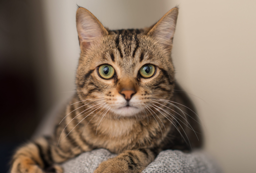

In [4]:


img = PILImage.create('cat.jpg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(256,256)



## Test with the dog image similarly downloaded

Is this a cat?: False.
Probability it's a cat: 0.000002


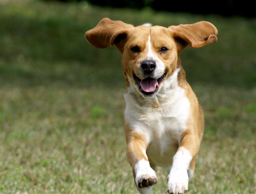

In [5]:
img = PILImage.create('dog.jpg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(256,256)